# Notebook to visualize VCR Data

First try

In [5]:
from pathlib import Path
import jsonlines as jsnl
import json
from tqdm import tqdm_notebook as tqdm

In [6]:
import matplotlib
matplotlib.use('agg')

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
import PIL

In [10]:
vcr_tdir = Path('../data/vcr1/')

In [11]:
vcr_imgs = vcr_tdir / 'vcr1images'

In [12]:
train_file = vcr_tdir / 'train.jsonl'

In [13]:
train_ann = jsnl.Reader(open(train_file))

In [14]:
t1 = []
for t in tqdm(train_ann.iter()):
#     print(t)
    t1.append(t)

In [15]:
len(t1)

212923

In [16]:
ann1 = t1[0]

In [17]:
ann1

{'movie': '3015_CHARLIE_ST_CLOUD',
 'objects': ['person', 'person', 'person', 'car'],
 'interesting_scores': [0],
 'answer_likelihood': 'possible',
 'img_fn': 'lsmdc_3015_CHARLIE_ST_CLOUD/3015_CHARLIE_ST_CLOUD_00.23.57.935-00.24.00.783@0.jpg',
 'metadata_fn': 'lsmdc_3015_CHARLIE_ST_CLOUD/3015_CHARLIE_ST_CLOUD_00.23.57.935-00.24.00.783@0.json',
 'answer_orig': 'No she does not',
 'question_orig': 'Does 3 feel comfortable?',
 'rationale_orig': 'She is standing with her arms crossed and looks disturbed',
 'question': ['Does', [2], 'feel', 'comfortable', '?'],
 'answer_match_iter': [3, 0, 2, 1],
 'answer_sources': [3287, 0, 10184, 2260],
 'answer_choices': [['Yes',
   'because',
   'the',
   'person',
   'sitting',
   'next',
   'to',
   'her',
   'is',
   'smiling',
   '.'],
  ['No', 'she', 'does', 'not', '.'],
  ['Yes',
   ',',
   'she',
   'is',
   'wearing',
   'something',
   'with',
   'thin',
   'straps',
   '.'],
  ['Yes', ',', 'she', 'is', 'cold', '.']],
 'answer_label': 1,
 'rati

In [ ]:
ann1.keys()

In [ ]:
ann1['objects']

In [ ]:
img = PIL.Image.open(vcr_imgs / ann1['img_fn'])

In [ ]:
img

In [59]:
metd = json.load(open(str(vcr_imgs / ann1['metadata_fn'])))

In [ ]:
metd.keys()

In [ ]:
metd['names']

In [60]:
metd['boxes'][3]

[2.4555816650390625,
 331.0960693359375,
 277.36383056640625,
 579.8651733398438,
 0.7267032265663147]

In [ ]:
poly1 = metd['segms'][-1][0]

In [ ]:
p1 = [tuple(x) for x in poly1]

In [ ]:
draw = PIL.ImageDraw.Draw(img, 'RGBA')

In [ ]:
draw.polygon(p1, fill=(255, 0, 0, 128), outline=(0, 0, 0, 128))

In [ ]:
img

### Import from File

In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
from visualizer import Visualizer

In [102]:
vis = Visualizer(vcr_tdir, ann1)

In [103]:
img = vis.get_img()

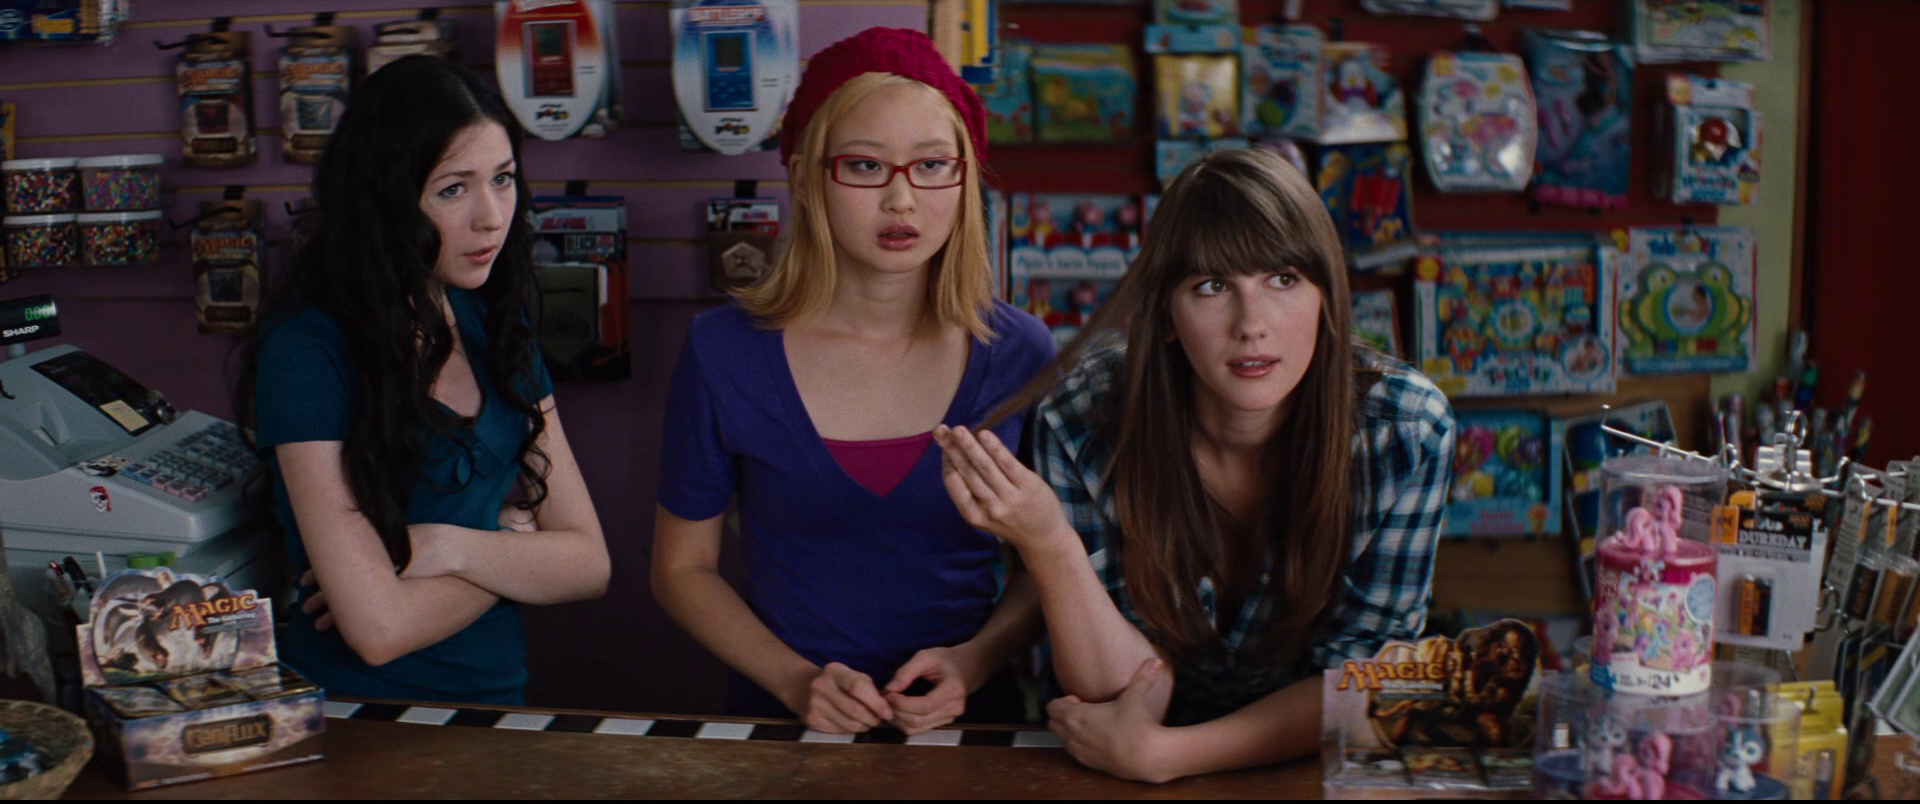

In [104]:
img

In [105]:
mask_img = vis.get_mask_ann_img()

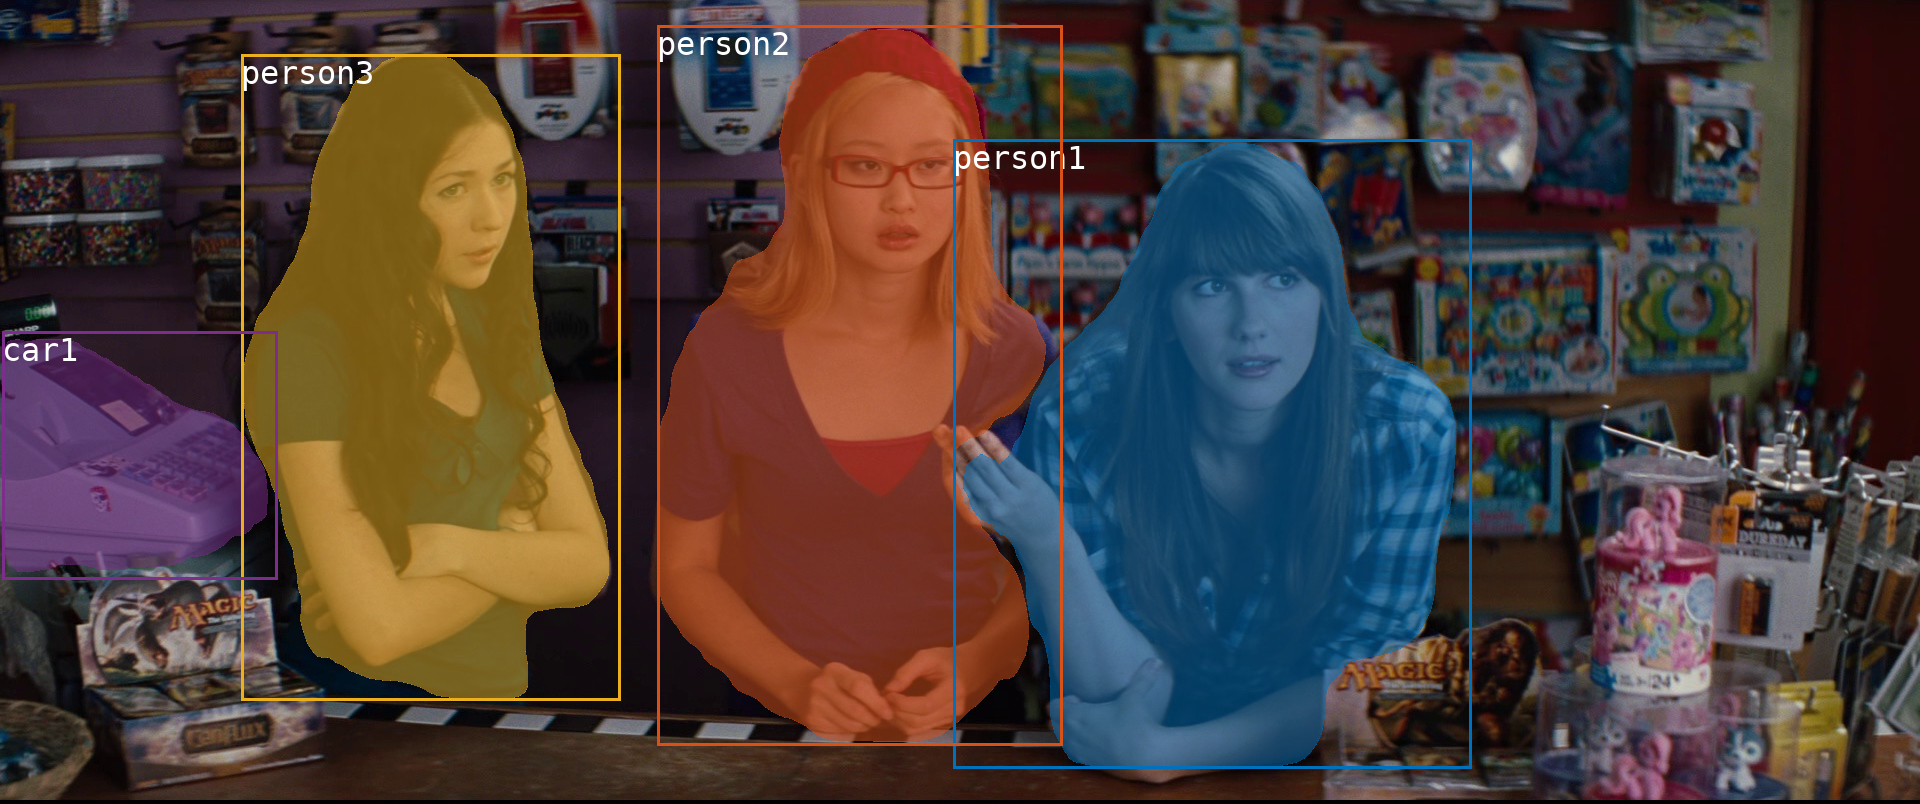

In [106]:
mask_img

In [115]:
odct = vis.get_QAR()

In [116]:
odct

OrderedDict([('question', 'Does person3 feel comfortable ?'),
             ('answer_choices',
              ['Yes because the person sitting next to her is smiling .',
               'No she does not .',
               'Yes , she is wearing something with thin straps .',
               'Yes , she is cold .']),
             ('answer_label', 1),
             ('rationale_choices',
              ['There is snow on the ground , and she is wearing a coat and hate .',
               'She is standing with her arms crossed and looks disturbed .',
               'She is sitting very rigidly and tensely on the edge of the bed . her posture is not relaxed and her face looks serious .',
               'person3 is laying in bed but not sleeping . she looks sad and is curled into a ball .']),
             ('rationale_label', 1)])

In [91]:
qu = vis.get_question()

In [94]:
answrs = vis.get_answers()

In [95]:
answrs

['Yes because the person sitting next to her is smiling .',
 'No she does not .',
 'Yes , she is wearing something with thin straps .',
 'Yes , she is cold .']

In [97]:
reas = vis.get_reasons()

In [98]:
reas

['There is snow on the ground , and she is wearing a coat and hate .',
 'She is standing with her arms crossed and looks disturbed .',
 'She is sitting very rigidly and tensely on the edge of the bed . her posture is not relaxed and her face looks serious .',
 'person3 is laying in bed but not sleeping . she looks sad and is curled into a ball .']

In [92]:
qu

'Does person3 feel comfortable ?'

In [100]:
vis.get_correct_answer_reason()

(1, 1)